In [ ]:
#! pip install -q kaggle

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#! mkdir ~/.kaggle

In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets list -s dogsvscats

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d 'salader/dogsvscats'

Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
 99% 1.05G/1.06G [00:13<00:00, 124MB/s]
100% 1.06G/1.06G [00:13<00:00, 85.9MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogsvscats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [6]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False, #Dense layer
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
conv_base.trainable=False

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dataset=ImageDataGenerator(
    rescale=1./255,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True
)

validation_dataset=ImageDataGenerator(
    rescale=1./255
)


In [13]:
train_generator=train_dataset.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'

)

validation_generator=train_dataset.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'

)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 183s 272ms/step - accuracy: 0.8335 - loss: 0.3792 - val_accuracy: 0.8942 - val_loss: 0.2401
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 188s 266ms/step - accuracy: 0.8989 - loss: 0.2373 - val_accuracy: 0.8990 - val_loss: 0.2322
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 210s 278ms/step - accuracy: 0.9046 - loss: 0.2193 - val_accuracy: 0.8886 - val_loss: 0.2590
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 265ms/step - accuracy: 0.9093 - loss: 0.2073 - val_accuracy: 0.9084 - val_loss: 0.2172
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 263ms/step - accuracy: 0.9192 - loss: 0.1988 - val_accuracy: 0.8970 - val_loss: 0.2473
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 264ms/step - accuracy: 0.9170 - loss: 0.1944 - val_accuracy: 0.9104 - val_loss: 0.2106
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 264ms/step - accuracy: 0.9236 - loss: 0.1791 - val_accuracy: 0.8974 - val_loss: 0.2367
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 266ms/step - accuracy: 0.9317 - loss: 0.16

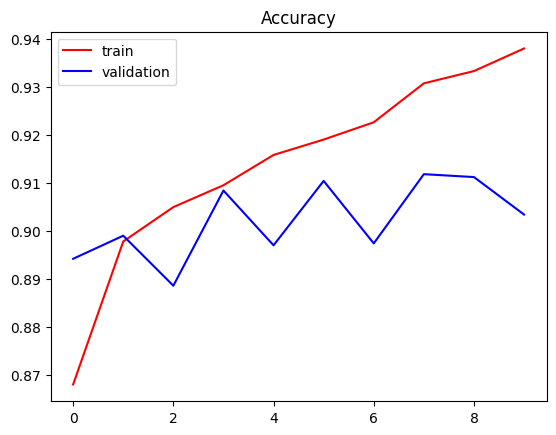

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Accuracy')
plt.legend()
plt.show()

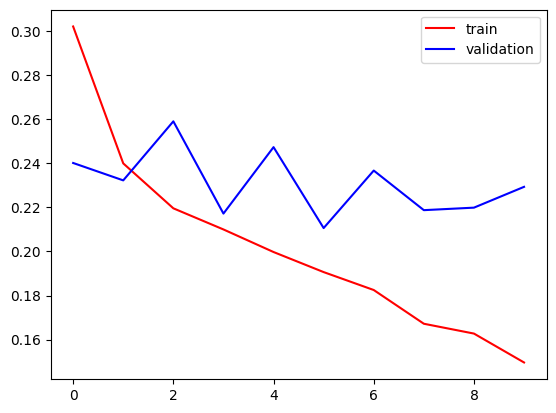

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting
#Add more data
#data Augmentation
#L1/L2 Regularizer
#Dropout
#Batch Norm
#reduce complexity

In [18]:
import cv2

In [25]:
test_img=cv2.imread('/content/dog1.jpg')

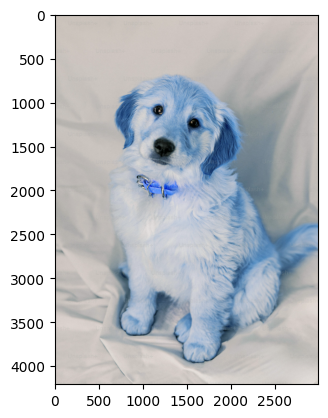

In [26]:
plt.imshow(test_img)

In [27]:
test_img.shape

(4206, 3000, 3)

In [28]:

test_img=cv2.resize(test_img,(150,150))

In [29]:
test_input=test_img.reshape((1,150,150,3))

In [30]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)